install geopandas pacjake to read dor reading the shapefile

In [ ]:
!pip install geopandas

In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [37]:
Belgium_map = gpd.GeoDataFrame.from_file('../data/arrondissements_shape/arrondissements_shape.shp')
#All four files (.dbf, .ptj, .shp, .shx) should be in the same folder, otherwise there are errors with reading the shapefile.

In [38]:
Belgium_map.head()

,Shape_Leng,Shape_Area,INS,LANG,Name1,Name2,geometry
0,169989.192808,1.003844e+09,11000,NN,Antwerpen,None,"POLYGON ((662106.376 740967.580, 662162.309 74..."
1,150947.175998,5.119499e+08,12000,NN,Mechelen,None,"POLYGON ((671311.591 707603.770, 671353.400 70..."
2,228401.102863,1.359241e+09,13000,NN,Turnhout,None,"MULTIPOLYGON (((688864.783 736887.001, 688888...."
3,62133.678433,1.625668e+08,21000,FN,Bruxelles,Brussel,"POLYGON ((653270.158 677320.255, 653291.392 67..."
4,281254.375729,9.488673e+08,23000,NN,Halle-Vilvoorde,None,"POLYGON ((643772.195 692449.425, 643815.652 69..."


Plot the shapefile

<AxesSubplot:>

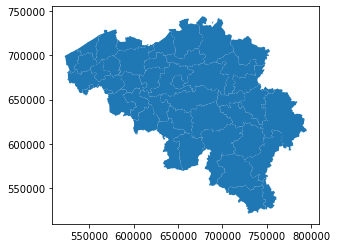

In [39]:
Belgium_map.plot()

Read the frequency file

In [40]:
heat_fr = pd.read_csv('../out/hw_freq_df.csv')
heat_fr.head()

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,41000,1,0,0,0,2,0,4,0,1,...,0,1,3,0,1,1,1,1,3,5
1,11000,1,0,0,0,2,0,4,0,1,...,0,1,3,0,1,1,1,1,3,5
2,81000,3,0,2,0,2,0,4,0,1,...,0,1,0,2,2,2,0,4,2,5
3,51000,1,0,0,0,2,0,4,0,1,...,0,1,0,1,1,1,0,2,2,5
4,45000,1,0,0,0,2,0,4,0,1,...,0,1,3,0,1,1,1,1,3,5


In [41]:
heat_intens = pd.read_csv('../out/hw_int_df.csv')
heat_intens.head()

,arron,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,41000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,2.825,5.126667,0.00,0.64,2.100,0.6,1.320,1.40,4.010
1,11000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,2.825,5.126667,0.00,0.64,2.100,0.6,1.320,1.40,4.010
2,81000,0.841667,0,1.15,0,1.025,0,1.72,0,2.0,...,0,2.400,0.000000,0.30,4.55,2.400,0.0,1.195,1.17,3.845
3,51000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,3.050,0.000000,0.84,1.24,2.925,0.0,0.470,1.80,4.285
4,45000,3.875000,0,0.00,0,1.350,0,2.25,0,2.4,...,0,2.825,5.126667,0.00,0.64,2.100,0.6,1.320,1.40,4.010


Keep only the necessary columns of a shapefile - geometry and code of arrondissement

In [42]:
Belgium_shapes = Belgium_map[['geometry', 'INS']]
Belgium_shapes = Belgium_shapes.rename(columns ={'INS':'arron'})
Belgium_shapes.head()

,geometry,arron
0,"POLYGON ((662106.376 740967.580, 662162.309 74...",11000
1,"POLYGON ((671311.591 707603.770, 671353.400 70...",12000
2,"MULTIPOLYGON (((688864.783 736887.001, 688888....",13000
3,"POLYGON ((653270.158 677320.255, 653291.392 67...",21000
4,"POLYGON ((643772.195 692449.425, 643815.652 69...",23000


In [54]:
list_10years = ['1980-1989', '1990-1999', '2000-2009', '2010-2019'] # needs to be created automatically for pipeline
list_5years = ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019']

# this function produces graphs for specific time intervals for frequency or intensity of heatwave

# data_type = ('freq', 'intensity')
def get_interval_intensity_or_count(list_year_intervals, data_type):
    if data_type == 'freq':
        df = heat_fr
        colors = 'Reds'
    else:
        df = heat_intens
        colors = 'YlOrBr'

    Belgium_shapes_merge = Belgium_shapes.merge(df, on='arron', suffixes=('', '_drop'))
    
    for i in list_year_intervals:
        start_str = i.split('-')[0]
        end_str = i.split('-')[1]
        df[i] = df.loc[: , start_str:end_str].mean(axis=1)
    
    fig, axees = plt.subplots(nrows=1, ncols=len(list_year_intervals), figsize=(18, 6))
    divider = make_axes_locatable(axees[-1])
    cax = divider.append_axes("right", size="5%", pad=0)
    vmin, vmax = 0, 4 # needs to be adapted for pipeline
    for i, k in enumerate(axees):
        k.set_axis_off()
        k = Belgium_shapes_merge.plot(ax=k, column=list_year_intervals[i], cmap=colors, legend=True, cax=cax, vmin=vmin, vmax=vmax)
        k.set_title(list_year_intervals[i])
    return None

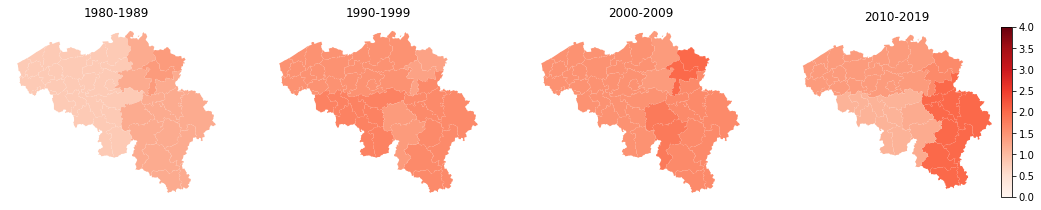

In [55]:
# chart for frequency for every 10 years
data_type='freq'
get_interval_intensity_or_count(list_10years, data_type)

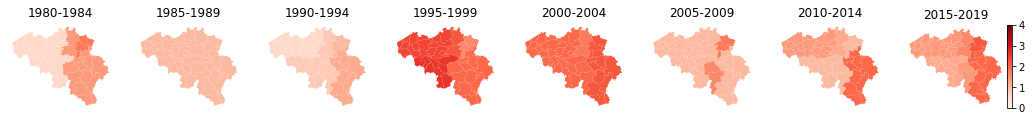

In [47]:
# chart for frequency for every 5 years
data_type = 'freq'
get_interval_intensity_or_count(list_5years, data_type)

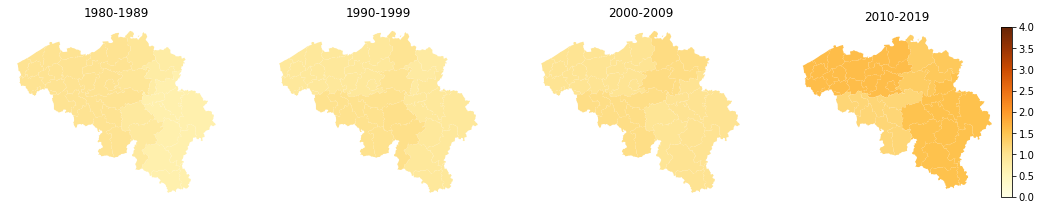

In [49]:
# chart for intensity for every 10 years
data_type = 'intensity'
get_interval_intensity_or_count(list_10years, data_type)

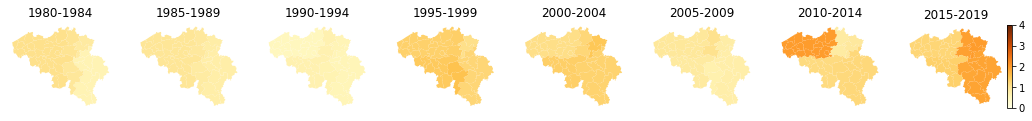

In [51]:
# chart for intensity for every 5 years
data_type = 'intensity'
get_interval_intensity_or_count(list_5years, data_type)

<AxesSubplot:>

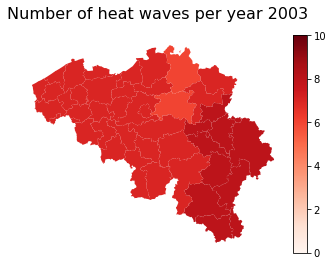

In [56]:
'''
This is merely for EDA (not part of pipeline)
'''

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)
ax.set_axis_off()
fig.suptitle('Number of heat waves per year 2003', fontsize=16)
cax = divider.append_axes("right", size="5%", pad=0.1)
vmin, vmax = 0, 10
Belgium_shapes_merge_eda = Belgium_shapes.merge(heat_fr, on='arron', suffixes=('', '_drop'))
Belgium_shapes_merge_eda.plot(column='2003', cmap='Reds', ax=ax, legend=True, cax=cax, vmin=vmin, vmax=vmax)